
# K-Means Clustering Tutorial

This notebook walks through the basics of the K-Means clustering algorithm using synthetic data and real-world image compression.

We will:
- Understand how K-Means works
- Apply it to synthetic 2D data
- Use it to compress an image by reducing its color palette


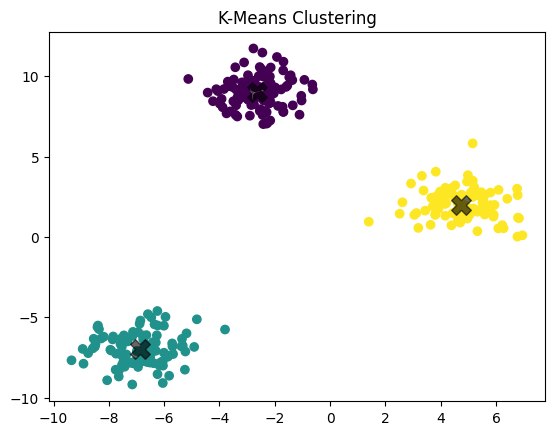

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create synthetic data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', s=200, alpha=0.6, marker='X')
plt.title("K-Means Clustering")
plt.show()


## How K-Means Algorithm Works

K-Means follows four main steps:

1. **Initialize** `k` centroids randomly.
2. **Assign** each point to the nearest centroid.
3. **Update** centroids as the mean of points in each cluster.
4. **Repeat** steps 2 and 3 until the centroids stop moving significantly.

The goal is to minimize the sum of squared distances between points and their assigned cluster center.


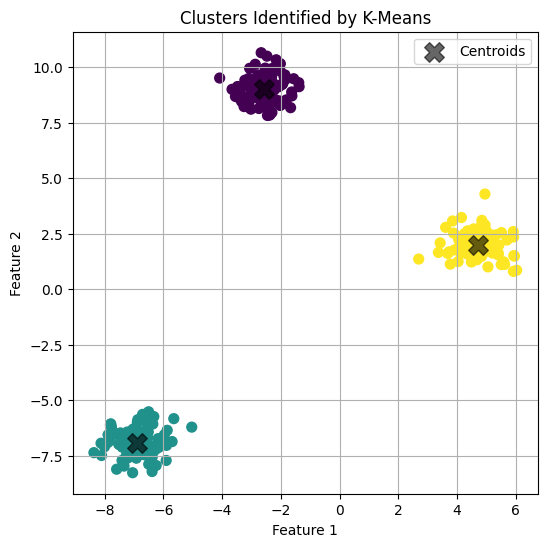

('kmeans_pre_clustering.png', 'kmeans_post_clustering.png')

In [2]:
# Generate synthetic dataset with 3 clusters
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Plot the original data (before clustering)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic Data (Before Clustering)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# Save the figure
pre_cluster_path = "kmeans_pre_clustering.png"
plt.savefig(pre_cluster_path)
plt.close()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Plot the clustered output
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6, marker='X', label='Centroids')
plt.title("Clusters Identified by K-Means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Save the clustered figure
post_cluster_path = "kmeans_post_clustering.png"
plt.savefig(post_cluster_path)
plt.close()

pre_cluster_path, post_cluster_path


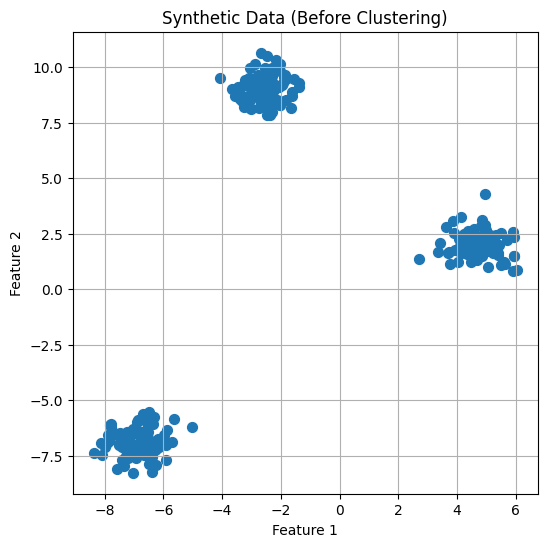

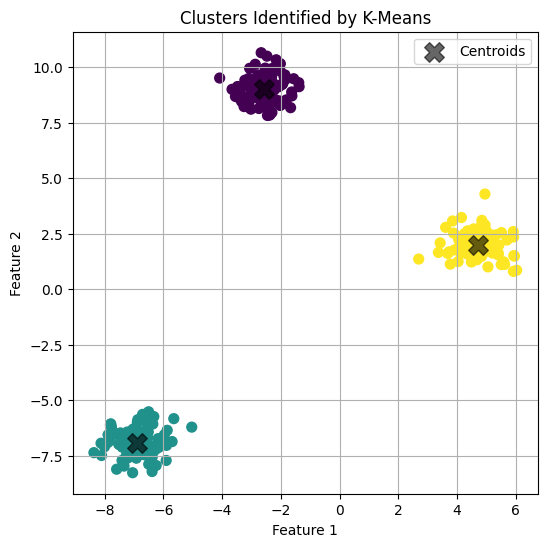

('kmeans_pre_clustering.png', 'kmeans_post_clustering.png')

In [3]:
# Generate synthetic 2D data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Plot original data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic Data (Before Clustering)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
pre_cluster_path = "kmeans_pre_clustering.png"
plt.savefig(pre_cluster_path)
plt.close()

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Plot clustered data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6, marker='X', label='Centroids')
plt.title("Clusters Identified by K-Means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
post_cluster_path = "kmeans_post_clustering.png"
plt.savefig(post_cluster_path)
plt.close()

pre_cluster_path, post_cluster_path



## Image Compression with K-Means

K-Means can be used to reduce the number of colors in an image.

Steps:
- Reshape the image into a 2D array of pixels
- Apply K-Means clustering to group colors
- Replace each pixel with the nearest cluster centroid

This reduces memory while maintaining visual quality — a great trick for web apps and mobile devices!


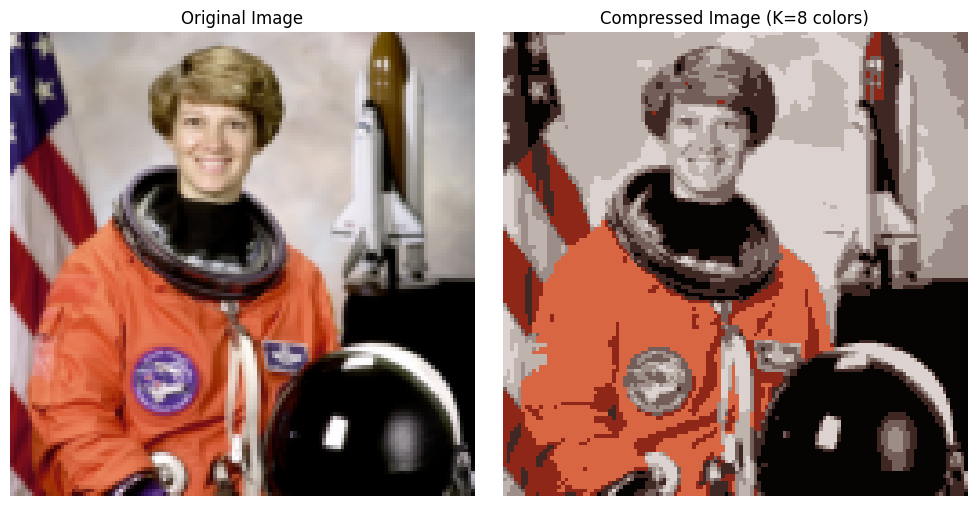

'kmeans_image_compression.png'

In [4]:
from skimage import io
import numpy as np

# Load a built-in image from skimage
from skimage.data import astronaut
from skimage.transform import resize

# Resize image to speed up processing
image = astronaut()
image = resize(image, (128, 128), anti_aliasing=True)
original_shape = image.shape

# Flatten the image into (num_pixels, 3)
image_2d = image.reshape(-1, 3)

# Apply K-Means with fewer colors (color quantization)
k = 8  # Number of colors
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(image_2d)
compressed_image = kmeans.cluster_centers_[labels].reshape(original_shape)

# Plot original and compressed image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(compressed_image)
axes[1].set_title(f"Compressed Image (K={k} colors)")
axes[1].axis('off')

# Save output
compressed_image_path = "kmeans_image_compression.png"
plt.tight_layout()
plt.show()
plt.savefig(compressed_image_path)
plt.close()

compressed_image_path



## Choosing the Right Number of Clusters (k)

To choose the optimal `k`, we use the **Elbow Method**. This involves:

- Running K-Means for different values of `k`
- Plotting the sum of squared distances (inertia) for each `k`
- Looking for the "elbow" in the plot — the point where inertia starts decreasing more slowly

This gives a good trade-off between model complexity and accuracy.



## Conclusion

K-Means is a versatile clustering algorithm that’s both simple and powerful.

In this notebook, we:
- Explored how it works step-by-step
- Visualized clustering on 2D data
- Used it for practical image compression

This technique is widely applicable in customer segmentation, document grouping, and more!
